In [1]:
# 3) Load the .s2p and plot S12
from pysonnet.outputs import SYZParameter
#import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the Touchstone file you just generated
def read_touchstone(file_path):
    sp = SYZParameter.from_touchstone(file_path)
    f = sp.f  # frequencies (GHz)
    S = sp.value  # 2x2 S-matrix (complex) array
    return {
        "s11": S[:, 0, 0],
        "s12": S[:, 0, 1],
        "s21": S[:, 1, 0],
        "s22": S[:, 1, 1],
    }


file_path = "/Users/eesh/Documents/mcp_hackathon_2025/cpw.s2p"
sp = SYZParameter.from_touchstone(file_path)
# :contentReference[oaicite:1]{index=1}

# frequencies (GHz) and the 2×2 S-matrix (complex) array
f = sp.f                       # shape (N,) in GHz
S = sp.value                   # shape (N, 2, 2)

# pick out S12 = measurement at port 1 due to excitation at port 2
s12 = S[:, 0, 1]

# plot magnitude in dB
plt.figure()
plt.plot(f, 20*np.log10(np.abs(s12)), marker='o')
plt.xlabel('Frequency (GHz)')
plt.ylabel('S$_{12}$ (dB)')
plt.title('S$_{12}$ vs Frequency')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/eesh/Documents/mcp_hackathon_2025/cpw.s2p'

In [6]:
S.shape

(848, 2, 2)

In [5]:
q_array = np.real(s12)
i_array = np.imag(s12)

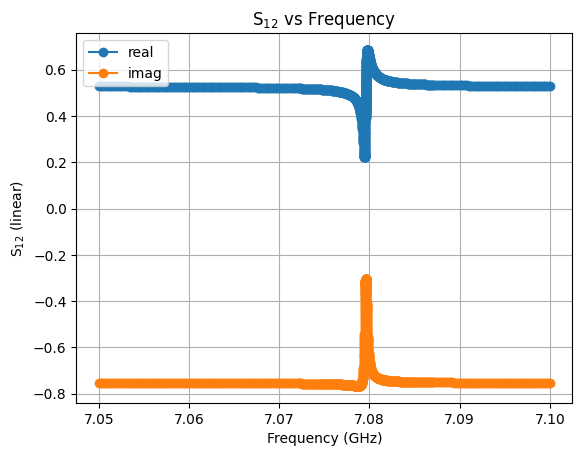

In [6]:
# plot magnitude in dB
plt.figure()
plt.plot(f,q_array, marker='o',label="real")
plt.plot(f,i_array, marker='o',label="imag")
plt.xlabel('Frequency (GHz)')
plt.ylabel('S$_{12}$ (linear)')
plt.title('S$_{12}$ vs Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Shannon's Circle FItting code 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scresonators_main.fit_resonator.resonator import Resonator, from_columns

# Create some synthetic data
freqs = np.linspace(5e9, 5.1e9, 1000)
center_freq = 5.05e9
Q = 10000
Qc = 15000

# Calculate the response
delta = (freqs - center_freq) / center_freq
response = 1 - (Q / Qc) / (1 + 2j * Q * delta)

# Convert to amplitude and phase
amps = 20 * np.log10(np.abs(response))
phases = np.angle(response)

# Create a Resonator object
resonator = Resonator()
resonator.from_columns(freqs, amps, phases)

# Set up the fitting method
resonator.fit_method(
    method="DCM", 
    MC_iteration=3, 
    MC_rounds=100, 
    preprocess_method="circle"
)

# Perform the fit
output = resonator.fit(plot="png")

# Print the results
print(f"Q = {output[0][0]:.0f}")
print(f"Qc = {output[0][1]:.0f}")
print(f"Frequency = {output[0][2]/1e9:.6f} GHz")
print(f"Phase = {output[0][3]:.6f} rad")

ModuleNotFoundError: No module named 'scresonators_main'

In [7]:
from pyCircFit_main import *

ModuleNotFoundError: No module named 'pyCircFit_main'

In [ ]:
cresults = circlefit(f*1e3, i_array, q_array, \
                     fittype='hanger', plotlabel='test', plot_detail = False, print_results=False, show_plots=False, fitQscl=1, fano = False)
fit_data = S21_hanger(cresults['a'], cresults['alpha'], 0, cresults['fr'], 
                          cresults['Qtot'], cresults['Qc'], cresults['phi'], f*1e3)

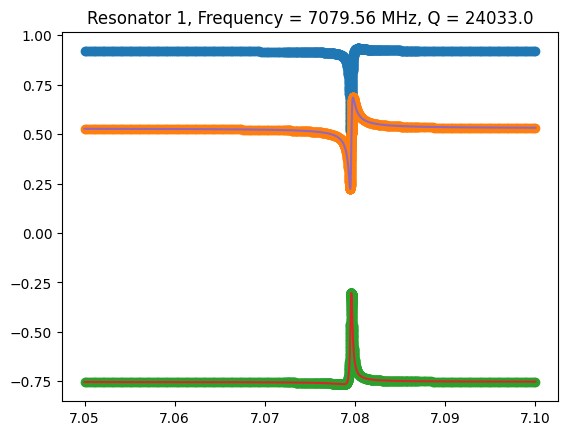

In [ ]:
plt.plot(f, np.abs(i_array*1j+q_array),'o')
plt.plot(f, q_array,'o')
plt.plot(f, i_array,'o')
plt.plot(f, np.real(fit_data))
plt.plot(f, np.imag(fit_data))
plt.title(f'Resonator {1}, Frequency = {np.round(cresults["fr"],2)} MHz, Q = {np.abs(np.round(cresults["Qtot"],1))}')
plt.show()

In [ ]:
cresults

{'xc': np.float64(-0.5346798189084464),
 'xc_stderr': np.float64(2.0338879104911273e-05),
 'yc': np.float64(0.453908201719094),
 'yc_stderr': np.float64(3.6428687478808674e-05),
 'rc': np.float64(0.2309767301430552),
 'rc_stderr': np.float64(1.8834718240593736e-05),
 'theta0': np.float64(5.95224118880279),
 'theta0_stderr': np.float64(0.00034837293002186584),
 'Qtot': np.float64(-24033.020516979115),
 'Qtot_stderr': np.float64(15.43363100887661),
 'fr': np.float64(7079.564243328018),
 'fr_stderr': np.float64(5.42388595977542e-05),
 'alpha': np.float64(2.5292867544255255),
 'alpha_stderr': np.float64(7.879829925359205e-05),
 'a': np.float64(0.9203225475323095),
 'a_stderr': np.float64(5.7542337941754915e-05),
 'phi': np.float64(6.001823526392114),
 'phi_stderr': np.float64(0.000332211746201955),
 'Qc': np.float64(-47879.564866520624),
 'Qc_stderr': np.float64(31.138634835713585),
 'Qi': np.float64(-46414.59836535869),
 'Qi_stderr': np.float64(64.19697744918771)}